<a href="https://www.kaggle.com/code/funxexcel/c7-text-classification-stage-1-in-class?scriptVersionId=159817359" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1/ Import Libraries

In [3]:
import numpy as np 
import pandas as pd 

# For Preprocesssing Text Data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualizing Wordcloud
from wordcloud import WordCloud

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# Check Performance
from sklearn.metrics import classification_report

# 2/ Import Data

In [4]:
train = pd.read_csv('/kaggle/input/text-handling-ipba-kn/spam_classification.csv')

In [5]:
train.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# 3/ Check Target Feature

<AxesSubplot:>

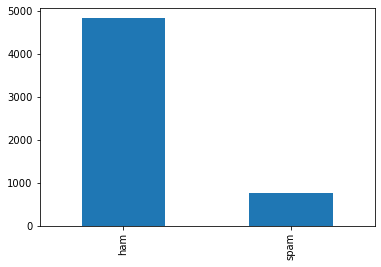

In [7]:
train['Category'].value_counts().plot.bar()

# 3/ Check Descriptive Stats

In [8]:
train.shape

(5572, 2)

In [9]:
# Create Length Feature


<AxesSubplot:ylabel='Frequency'>

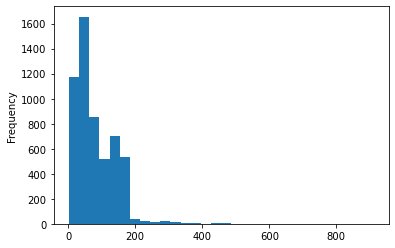

In [10]:
train['text_lenght'].plot.hist(bins = 30)

In [11]:
train.head()

,Category,Message,text_lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# 4/ Cleaning - Convert to Lower Case

In [12]:
# Showing only


0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5572, dtype: object

In [13]:
# Commit to Table
# train['Message'] = 

In [14]:
train.head()

,Category,Message,text_lenght
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


# 5/ Cleaning - Remove Stopwords

In [19]:
# Get Stopwords
stop = stopwords.words('english')

In [20]:
# Tokenize and Remove Stop Words
train['Message'].apply(lambda x: [word for word in x.split() if word not in stop])

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, £750, pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

In [21]:
train['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [22]:
# Join the words back
# train['Message'] = 

In [23]:
train.head(10)

,Category,Message,text_lenght
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61
5,spam,freemsg hey darling 3 weeks word back id like ...,147
6,ham,even brother like speak treat like aids patent,77
7,ham,per request melle melle oru minnaminunginte nu...,160
8,spam,winner valued network customer selected receiv...,157
9,spam,mobile 11 months u r entitled update latest co...,154


# 5/ Cleaning - Lemmatize

In [24]:
wordnet = WordNetLemmatizer()

In [25]:
# Lemmatize


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [26]:
# Commit to Table
# train['Message'] = 

In [27]:
train.head()

,Category,Message,text_lenght
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


# 6/ Post Pre Cleaning  

In [28]:
# Create Length Feature
train['post_text_lenght'] = train['Message'].apply(lambda x : len(x))
train.head()

,Category,Message,text_lenght,post_text_lenght
0,ham,go jurong point crazy available bugis n great ...,111,82
1,ham,ok lar joking wif u oni,29,23
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,135
3,ham,u dun say early hor u c already say,49,35
4,ham,nah dont think goes usf lives around though,61,43


In [ ]:
# Export to Check
# train.head(50).to_csv('spam_data_cleaned.csv', index = False)

# 7/ Partition

In [31]:
y = train['Category']
X = train[['Message','text_lenght']] # Dont use Ids

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0) # Can you stratify?

# 7/ Preprocessing - Transforming to Numericals  Building  Models
- **CountVectorizer (sklearn.feature_extraction.text)**
- TF-IDF
- ngrams

# 7.1/ CountVectorizer Model

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create and Intance with max 3000 features
# cv = 

In [33]:
# Fit 


CountVectorizer(max_features=3000)

In [34]:
X_train_cv = cv.transform(X_train['Message']).toarray()
X_val_cv = cv.transform(X_val['Message']).toarray()

In [35]:
train_with_cv = pd.DataFrame(X_train_cv, columns= cv.get_feature_names_out())
train_with_cv.head()

,020603,02073162414,020903,021,0578,071104,07742676969,07821230901,07xxxxxxxxx,0800,...,youve,yr,yrs,yummy,yun,yunny,yuo,yup,zed,zoe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train_with_cv.columns.tolist()

['020603',
 '02073162414',
 '020903',
 '021',
 '0578',
 '071104',
 '07742676969',
 '07821230901',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '0845',
 '08452810073',
 '08452810075over18s',
 '0870',
 '08700621170150p',
 '08701417012',
 '08701417012150p',
 '0870241182716',
 '08702840625comuk',
 '08706091795',
 '08707509020',
 '08712101358',
 '08712300220',
 '08712317606',
 '08712402050',
 '08712405020',
 '08712405022',
 '08712460324',
 '0871277810810',
 '08715705022',
 '08718720201',
 '08718726270',
 '08718726270150gbpmtmsg18',
 '08718727870',
 '08718730666',
 '08719180248',
 '08719181513',
 '09050090044',
 '09056242159',
 '09058091854',
 '09058094565',
 '09058094597',
 '09058099801',
 '09061209465',
 '09061213237',
 '09061221066',
 '09061701461',
 '09061702893',
 '09061743386',
 '09061743806',
 '09063458130',
 '09064011000',
 '09064012160',
 '09064019014

In [ ]:
# Export to Check
# train_with_cv.head(50).to_csv('spam_data_count.csv', index = False)

# PCA

In [ ]:
# Import Package


In [ ]:
# Create Instance


In [ ]:
# Fit


In [ ]:
# Trasform


# 8/ Build Model Predict

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB().fit(X_train_cv,y_train)

# 9/ Predict or Train and Validation

In [38]:
y_train_pred = nb.predict(X_train_cv)
y_val_pred = nb.predict(X_val_cv)

# 10/ Check Accuracy

In [39]:
print('Train Report ---')
print(classification_report(y_train, y_train_pred))

Train Report ---
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      3870
        spam       0.96      0.95      0.96       587

    accuracy                           0.99      4457
   macro avg       0.98      0.97      0.97      4457
weighted avg       0.99      0.99      0.99      4457



In [40]:
print('Validation Report ---')
print(classification_report(y_val, y_val_pred))

Validation Report ---
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       955
        spam       0.96      0.94      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

